# Работа с Gemini Api

## Учебный материал

Документация работы с Gemini
https://ai.google.dev/gemini-api/docs/image-understanding?hl=ru

Для тестирования создайте папку **imm**, от image, и загружайте в неё фоточки.

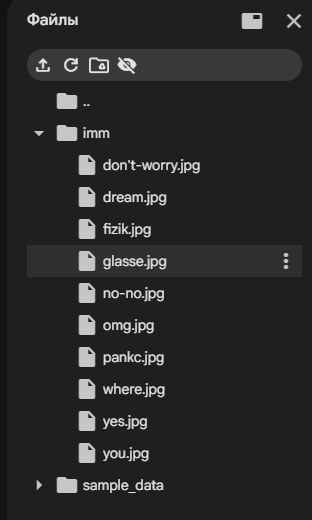

## Установка библиотек

In [ ]:
!pip install -q -U google-genai

## Подключение библиотек

In [ ]:
from google import genai
from google.genai import types
from PIL import Image

import requests
import os

## Ключ

In [ ]:
from google.colab import userdata

In [ ]:
client = genai.Client(api_key= userdata.get('code_key'))

## Кодовая часть

### TEXT

In [ ]:
response = client.models.generate_content(
    model='gemini-2.0-flash',
    contents='How long does the average basketball match last?'
)
print(response.text)

<>:7: SyntaxWarning: invalid escape sequence '\|'
<>:7: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipython-input-639095656.py:7: SyntaxWarning: invalid escape sequence '\|'
  print('-\|<...>|/-'*20)


The average basketball match length depends on the level of play:

*   **NBA:** Approximately 2 hours to 2 hours and 30 minutes.
*   **FIBA (International):** Around 2 hours.
*   **College (NCAA):** Typically 2 hours to 2 hours and 15 minutes.
*   **High School:** Roughly 1 hour and 30 minutes.

These times can vary depending on factors like timeouts, fouls, reviews, and overtime periods.


"\nprint('-\\|<...>|/-'*20)\nprint(response.model_dump_json(\n    exclude_none=True, indent=4))\n"

###IMAGE - смысл images - https

In [ ]:
image_path = "https://i.pinimg.com/736x/40/80/90/4080901b244e61b8524d19e5617e7b5a.jpg"
image_bytes = requests.get(image_path).content
image = types.Part.from_bytes(
  data=image_bytes, mime_type="image/jpeg"
)

response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=["What is this image?", image],
)

print(response.text)

This image depicts a **cartoon frog**.

It is a character from the popular British children's animated television series **Peppa Pig**. This specific frog is often identified as **Freddie Frog** or a generic frog character from the show.

The frog has a very simple, two-dimensional design, characteristic of the Peppa Pig animation style, with a green body, circular eyes, and a straight line for a mouth, giving it a rather **expressionless or unimpressed look**. Due to its distinct blank expression, this image is also widely used as an **internet meme**.


### IMAGE - смысл images - файл

In [ ]:
with open('/content/imm/you.jpg', 'rb') as f:
  image_bytes = f.read()

response = client.models.generate_content(
  model='gemini-2.5-flash',
    contents=[
      types.Part.from_bytes(
        data=image_bytes,
        mime_type='image/jpeg',
      ),
      'Caption this image.'
    ]
  )

print(response.text)

This iconic image of a grinning monkey has many potential captions, ranging from literal to humorous to reflective of its famous origin:

**Focusing on the "Selfie" Aspect:**

*   The original selfie king!
*   Say "cheese!" (or "banana!")
*   When you accidentally take the best selfie of all time.
*   "Did I get my good side?"
*   Proof that monkeys invented the selfie.

**Focusing on the Smile/Laugh:**

*   Pure joy, monkey style!
*   That's one infectious smile!
*   Grinning from ear to ear (and then some!).
*   When someone tells a really good joke.
*   Unadulterated happiness.

**Descriptive/Evocative:**

*   A moment of pure, unadulterated primate delight.
*   The wide-eyed, toothy grin of a macaque in its natural habitat.
*   An expressive face captured forever.

**Humorous/Relatable:**

*   My face when I hear the food is ready.
*   Me trying to act normal on a video call.
*   When you finally get that perfect shot.

**Short & Sweet:**

*   Happy monkey!
*   What a grin!
*   Ico

### Однопоточный скан папки

In [ ]:
folder_path = "/content/imm"                                                    # Например: "C:/Users/name/Pictures"

supported_formats = ['.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.webp'] # Создаем список поддерживаемых форматов изображений

all_files = os.listdir(folder_path)                                             # Получаем список всех файлов в указанной папке

image_files = []                                                                # Создаем пустой список для хранения путей к файлам изображений

for file in all_files:                                                          # Проходим по всем файлам в папке
    file_ext = os.path.splitext(file)[1].lower()                                # Получаем расширение файла (последняя часть после точки) и приводим к нижнему регистру

    if file_ext in supported_formats:                                           # Проверяем, есть ли расширение в списке поддерживаемых форматов
        full_path = os.path.join(folder_path, file)                             # Если да, добавляем полный путь к файлу в список изображений
        image_files.append(full_path)
print(image_files)
                                                                                # Если изображения найдены, начинаем их открывать по очереди
if image_files:
    for i, image_path in enumerate(image_files, 1):                             # Проходим по каждому файлу изображения с нумерацией (начиная с 1)
        print(f"\n{i} изображение открыто,\
        \n путь: {image_path}")

        with open(image_path, 'rb') as f:                                       # Открываем i файл
            image_bytes = f.read()

        response = client.models.generate_content(
          model='gemini-2.5-flash',
          contents=[types.Part.from_bytes(
            data=image_bytes,
            mime_type = 'image/jpeg',),'Caption this image.'])                  # Отправляем файл по api, указывая формат ('image/jpeg'), и запрос

        print(response.text)                                                    # Выводим ответ на запрос от Gemini


else:                                                                           # Если изображений не найдено
    print("В папке нету изображений")

print("Файлы закончились")

['/content/imm/pankc.jpg', '/content/imm/where.jpg', '/content/imm/dream.jpg', '/content/imm/glasse.jpg', "/content/imm/don't-worry.jpg", '/content/imm/omg.jpg', '/content/imm/fizik.jpg', '/content/imm/yes.jpg', '/content/imm/no-no.jpg', '/content/imm/you.jpg']

1 Открыто /content/imm/pankc.jpg
Here are a few caption options for the image, playing on the obvious pun:

**Short & Sweet:**
*   Recycling metal.
*   Properly sorted.
*   This is my genre.
*   Metal.

**Playing on the Pun:**
*   That's some *heavy* metal recycling.
*   Finally, a use for all that metal.
*   When you take "recycle metal" literally.
*   My natural habitat: the metal bin.
*   Found their true calling.

**More Descriptive/Humorous:**
*   Looks like someone found their true home... in the metal bin.
*   The most accurate recycling I've ever seen.
*   Don't worry, he's just being properly recycled.
*   Every metalhead's true home.
*   He belongs in the metal bin. Literally.

**Relatable (for metal fans):**
*   Me, 